## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [2]:
# libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Remove missing data

Remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [3]:
# read csv
df = pd.read_csv("car_sell.csv")
print(df.shape)

(4340, 9)


In [4]:
# display df
df

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4335,4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014.0,409999,80000,Diesel,Individual,Manual,Second Owner
4336,4336,Hyundai i20 Magna 1.4 CRDi,2014.0,409999,80000,Diesel,Individual,Manual,Second Owner
4337,4337,Maruti 800 AC BSIII,2009.0,110000,83000,Petrol,Individual,Manual,Second Owner
4338,4338,Hyundai Creta 1.6 CRDi SX Option,2016.0,865000,90000,Diesel,Individual,Manual,First Owner


Let's remove the 'Unnamed: 0' column to make the dataset cleaner.

In [5]:
# remove 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
# check the current column of df
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

The 'Unnamed: 0' column has been dropped.

Now let's proceed to handle the missing values.

In [7]:
# counting number of Null values in each column
df.isnull().sum()

name               0
year             310
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64

The 'fuel' column's missing value is still undetected, let's set 'none' as a missing value.

In [8]:
# define 'none' as one of the missing values
missing_values = ['none']

In [9]:
# add none as the new missing value
df = pd.read_csv("car_sell.csv", na_values= missing_values)

In [10]:
# re-check values of 'fuel'
df.fuel.unique()

array(['Petrol', 'Diesel', nan, 'CNG', 'LPG', 'Electric'], dtype=object)

In [11]:
# re-check missing value, ensuring that the missing value of 'fuel' is detected.
df.isnull().sum()

Unnamed: 0         0
name               0
year             310
selling_price      0
km_driven          0
fuel             159
seller_type        0
transmission       0
owner              0
dtype: int64

The missing value in 'fuel' has been detected, let's proceed to compare the data before and after removing the missing value.

In [12]:
# print the length of the data before removing missing data
before = len(df)
print(f"Length of the data before removing missing data: {before}")

Length of the data before removing missing data: 4340


In [13]:
# remove the missing data
df.dropna(inplace=True)

# print the length of the data after removing missing data
after = len(df)
print(f"Length of the data after removing missing data: {after}")

Length of the data after removing missing data: 3886


Descriptive statistics

With the cleaned data, the data summarised will display:

* the total number of unique name, unique seller_type, unique transmission, and unique owner
* descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


### total number of unique name, unique seller_type, unique transmission, and unique owner

In [14]:
# print the total number of unique data for each columns
unique_name = df.name.nunique()
unique_seller_type = df.seller_type.nunique()
unique_transmission = df.transmission.nunique()
unique_owner = df.owner.nunique()

print(f"Total number of unique name: {unique_name}")
print(f"Total number of unique seller_type: {unique_seller_type}")
print(f"Total number of unique transmission: {unique_transmission}")
print(f"Total number of unique owner: {unique_owner}")

Total number of unique name: 1402
Total number of unique seller_type: 3
Total number of unique transmission: 2
Total number of unique owner: 5


### descriptive statistics, including the total number, mean, std, min and max regarding all km_driven

In [15]:
# display the descriptive statistics for 'km_driven'
total_km = df.km_driven.count()
mean_km = df.km_driven.mean()
std_km = df.km_driven.std()
min_km = df.km_driven.min()
max_km = df.km_driven.max()

# print the results
print(f"Total number of km_driven: {total_km}")
print(f"Mean of km_driven: {mean_km}")
print(f"Standard deviation of km_driven: {std_km}")
print(f"Min value of km_driven: {min_km}")
print(f"Max value of km_driven: {max_km}")

Total number of km_driven: 3886
Mean of km_driven: 66313.27920741122
Standard deviation of km_driven: 46679.603915975706
Min value of km_driven: 1
Max value of km_driven: 806599


Or we can use the `agg()` function to summarize the statistics in a more-readable way.

In [16]:
# summarize required descriptive statistics for 'km_driven'
df.km_driven.agg(['count', 'mean', 'std', 'min', 'max'])

count      3886.000000
mean      66313.279207
std       46679.603916
min           1.000000
max      806599.000000
Name: km_driven, dtype: float64

### descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type

In [17]:
# group by the seller_type to the selling_price
grouped_seller = df.groupby('seller_type')['selling_price']

# count the grouped seller_type by the selling_price
count_gs = grouped_seller.count().reset_index(name="count")
print(count_gs)

# display the descriptive statistics required
print(count_gs.describe())

        seller_type  count
0            Dealer    889
1        Individual   2903
2  Trustmark Dealer     94
             count
count     3.000000
mean   1295.333333
std    1447.912405
min      94.000000
25%     491.500000
50%     889.000000
75%    1896.000000
max    2903.000000


With the `describe()` function, we can easily obtain the mean, std, max, and min of the number of grouped selling_price by the seller_type.`

### descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type

In [18]:
# group by owner type and years sold
grouped_owner = df.groupby('owner')['year']

# count the number of grouped owner by the years
count_oy = grouped_owner.count().reset_index(name="count")
print(count_oy)

# display the descriptive statistics required
print(count_oy.describe())

                  owner  count
0           First Owner   2532
1  Fourth & Above Owner     67
2          Second Owner   1000
3        Test Drive Car     14
4           Third Owner    273
             count
count     5.000000
mean    777.200000
std    1057.123314
min      14.000000
25%      67.000000
50%     273.000000
75%    1000.000000
max    2532.000000


Similar to Q2.3, the `describe()` function, helps us to get the mean, std, max, and min of the number of grouped owner by years easily.

## Plotting and Analysis

This part explores the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? 


### Fuel vs. Selling Price

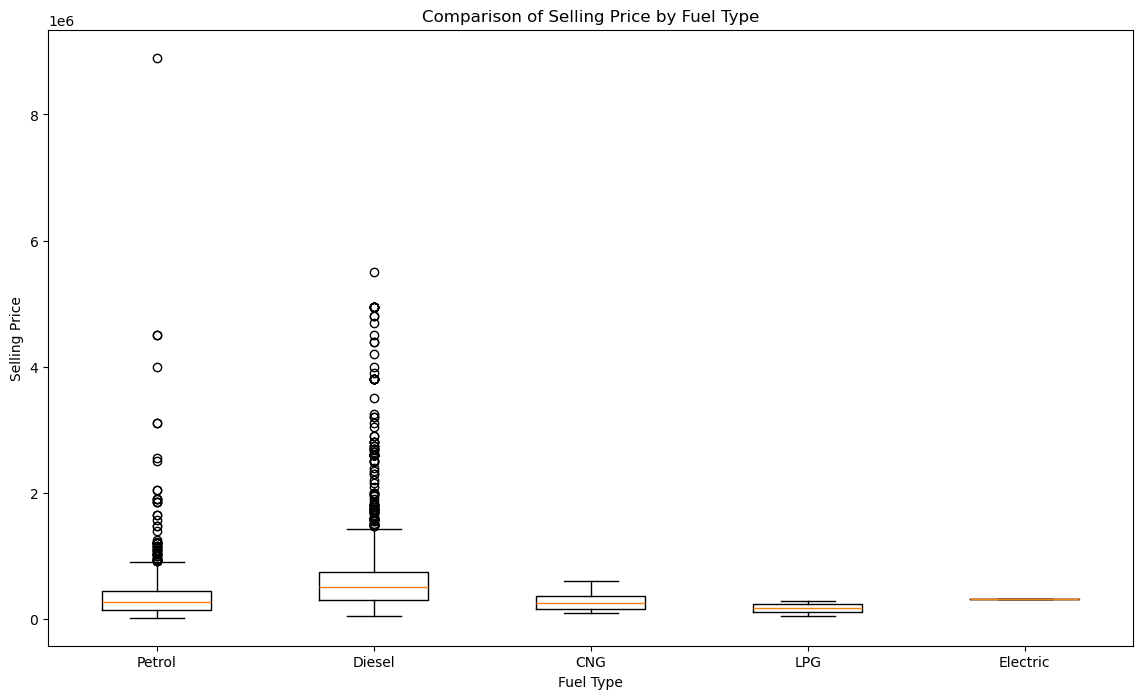

In [19]:
# create variable for label types
fuel_types = df.fuel.unique()

# provide data for plotting
fuel_plot = [df[df['fuel'] == fuel]['selling_price'] for fuel in fuel_types]

# create the boxplot
plt.figure(figsize=(14, 8))
plt.boxplot(fuel_plot, labels=fuel_types)

# input title and labels
plt.title('Comparison of Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

The figure above shows that diesel has the highest variability and the highest price for cars sold in the market. Diesel also has the most outliers, showing that customers are willing to pay more, indicating that cars fueled with diesel have the highest demand in the market.

Subsequently, petrol follows the similar trend of diesel, which makes petrol the second-most popular fuel type in cars sold in this particular area, with prices as diverse as diesel's. Both diesel and petrol contradicts that LPG-fueled cars with the lowest median, meaning that it is the least expensive car sold in the market.

Meanwhile, there seems to be no variability in selling prices of electric cars. This could imply that electric cars are less desired, or since it's a "new" model, customers are not as aware of its efficiency compared to the more well-known fuel types like diesel and petrol. Furthermore, this no-variability could be also caused by incorrect data. 

### Year vs. Selling Price

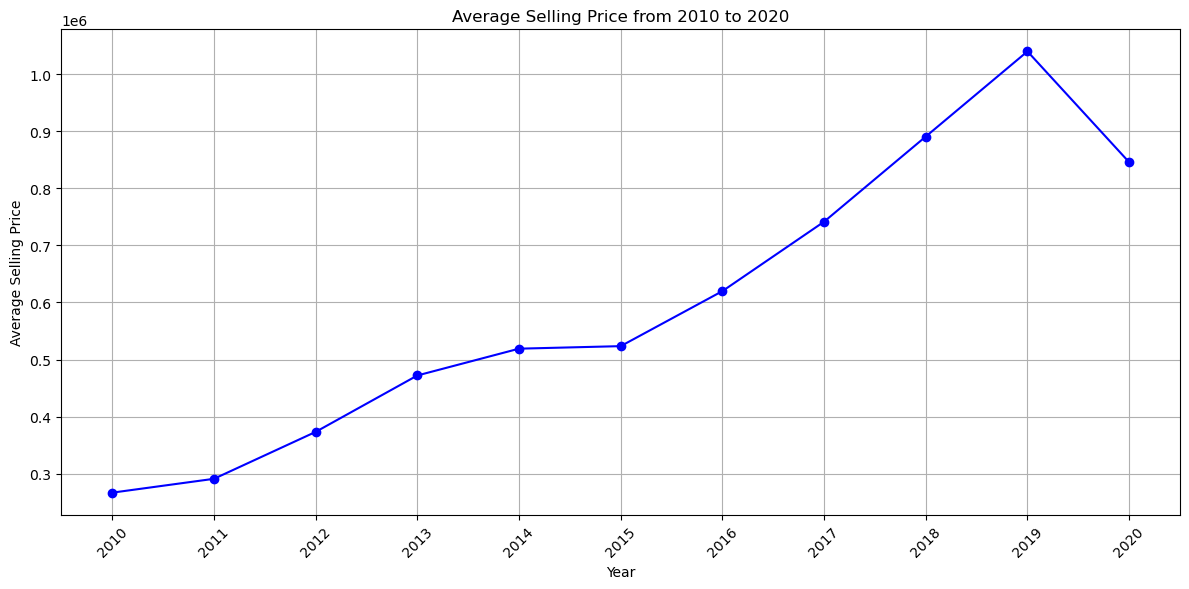

In [20]:
# only include years from 2010 to 2020
df_year = df[(df['year'] >= 2010) & (df['year'] <= 2020)]

# aggregate data by year and mean of selling price
df_aggregated = df_year.groupby('year')['selling_price'].mean().reset_index()

# create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_aggregated['year'], df_aggregated['selling_price'], marker='o', linestyle='-', color='b')
plt.title('Average Selling Price from 2010 to 2020')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.xticks(df_aggregated['year'], rotation=45)
plt.tight_layout()
plt.show()

Based on this chart, the cars sold from the year 2010 seem to have a steady increase in the average selling price, until it significantly increases in the year 2016 to 2019.

This rise could possibly be caused due to improved features in cars sold, implying new updates were installed in cars as technology advances. Inflation is also a probable cause of the consistent increase in car prices over the years.

Moreover, there is a remarkable drop in car prices sold in the year 2020.
This decrease in price could be very well affected by the COVID-19 phenomena, where the entire world is forced to isolate.

Hence, car prices plummeted due to car purchases being nonessential at that time, to attract more buyers. 

Let's have a more-detailed look into the correlation of year and selling price with the boxplot.

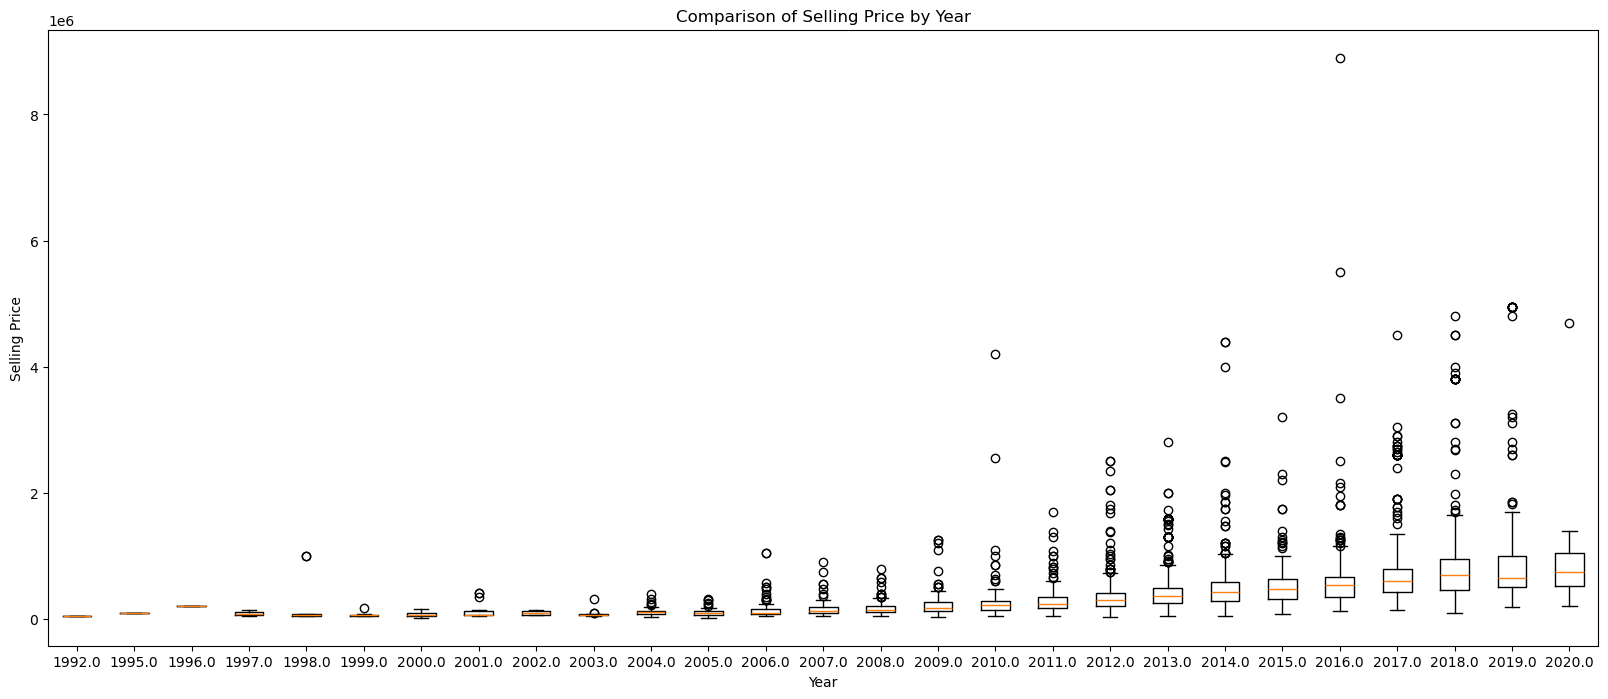

In [21]:
# create variable for label types
years = sorted(df.year.unique())

# provide data for plotting
year_plot = [df[df['year'] == year]['selling_price'] for year in years]

# create the boxplot
plt.figure(figsize=(20, 8))
plt.boxplot(year_plot, labels=years)

# input title and labels
plt.title('Comparison of Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

Corresponding with the line chart generated previously, this boxplot also shows a pattern of increase among car prices sold every year. 

Outliers have been consistently present since the year 2004, only steadily increasing until it peaked in 2016. This shows that an unusually expensive car was sold in 2016. Further research needs to be conducted in finding out what major advancement or whether a serious case of inflation happened in 2016. 

Not only outliers, but variability also shows to be increasing through the years. This indicates that car prices are more diverse and how the market gets more competitive over time.

### Seller Type vs. Selling Price

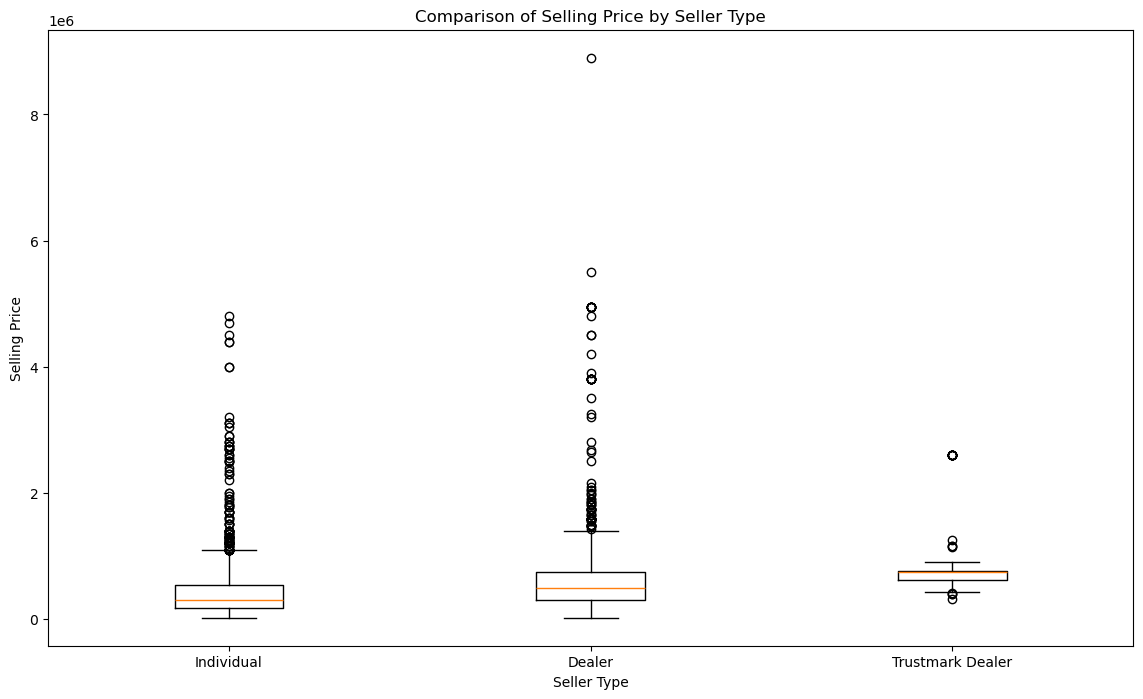

In [22]:
# create variable for label types
sellert = (df.seller_type.unique())

# provide data for plotting
seller_plot = [df[df['seller_type'] == seller]['selling_price'] for seller in sellert]

# create the boxplot
plt.figure(figsize=(14, 8))
plt.boxplot(seller_plot, labels=sellert)

# input title and labels
plt.title('Comparison of Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.show()

From the different seller types, it can be seen that cars sold by individuals generally have the lowest price, compared to other seller types. 

Individual sellers are more likely to sell cars at lower prices, possibly to sell it quickly for some urgent financial needs. 
Additionally, individual cars are priced generally lower than dealer and trustmark dealer because these dealers tend to provide more professional services, warranties, and standardized car conditions than cars sold individually.

Although it has the lowest price in the market, individual sellers also have a high number of outliers. This suggests that some highly-priced cars sold by individuals could be from a rare collection, some luxury cars, or just generally well-maintained cars. 

But the highest number of outliers and range are seen in the cars sold by regular dealers. This could mean that the cars sold by dealers cater to a broader customer base and they have more diverse cars sold. Also, it might tell us that dealers are more flexible in terms of pricing negotiations or offering discounts, hence the selling prices are spread more widely. 

Moreover, this figure shows that cars sold by trustmark dealers have the highest price. Trustmark dealers generally have this premium and more reputable image on the market. The high price reflects the high standards and service quality offered by the trustmark dealers compared to the regular dealers. 

Also, with the trustmark dealer's median being in the 75th percentile tells us that the price distribution is right-skewed, suggesting a smaller variability in the lower range and that high-priced cars are sold less frequently.

### Transmission vs. Selling Price

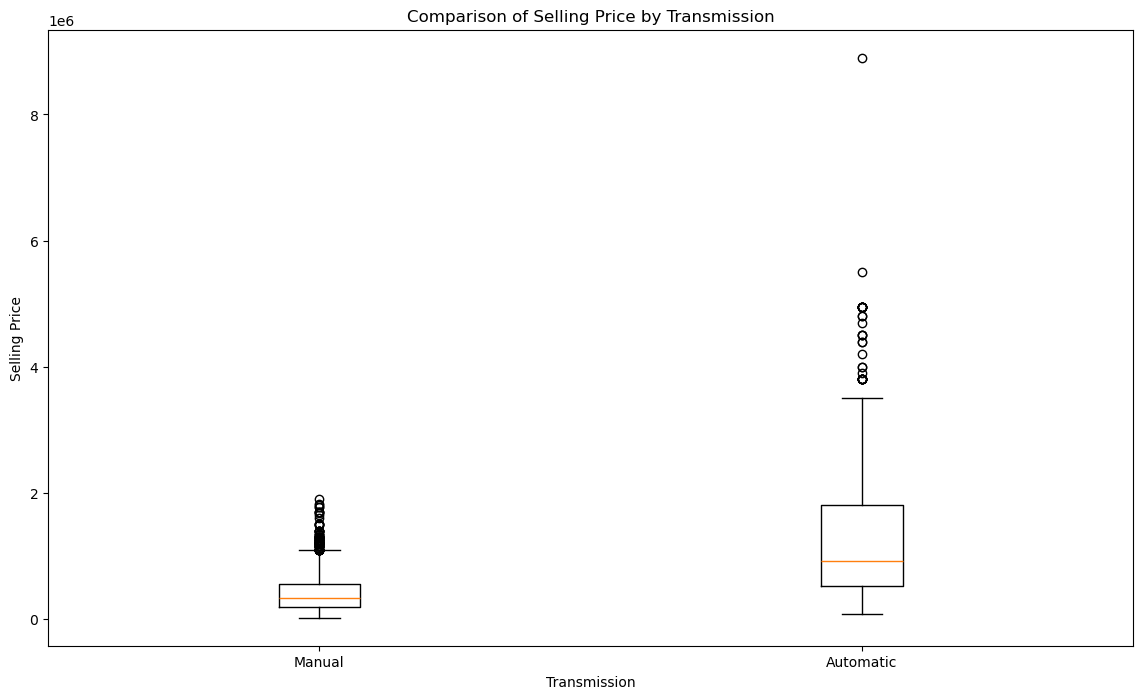

In [23]:
# create variable for label types
transmissions = df.transmission.unique()

# provide data for plotting
trans_plot = [df[df['transmission'] == transmission]['selling_price'] for transmission in transmissions]

# create the boxplot
plt.figure(figsize=(14, 8))
plt.boxplot(trans_plot, labels=transmissions)

# input title and labels
plt.title('Comparison of Selling Price by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.show()

The figure above shows a clear price range difference between the car transmissions. Automatic car transmissions are seen to have higher prices as well as broader range of prices.

Even though both transmissions have outliers present, higher outliers are found in the automatic transmission, indicating significantly more expensive prices that might be caused by higher-end models, more ease of use or more advanced features embedded among cars with automatic transmissions. 

This finding also implies that automatic transmissions are more popular in the market, causing higher customer demands, contributing to their higher prices.

### Owner vs. Selling Price

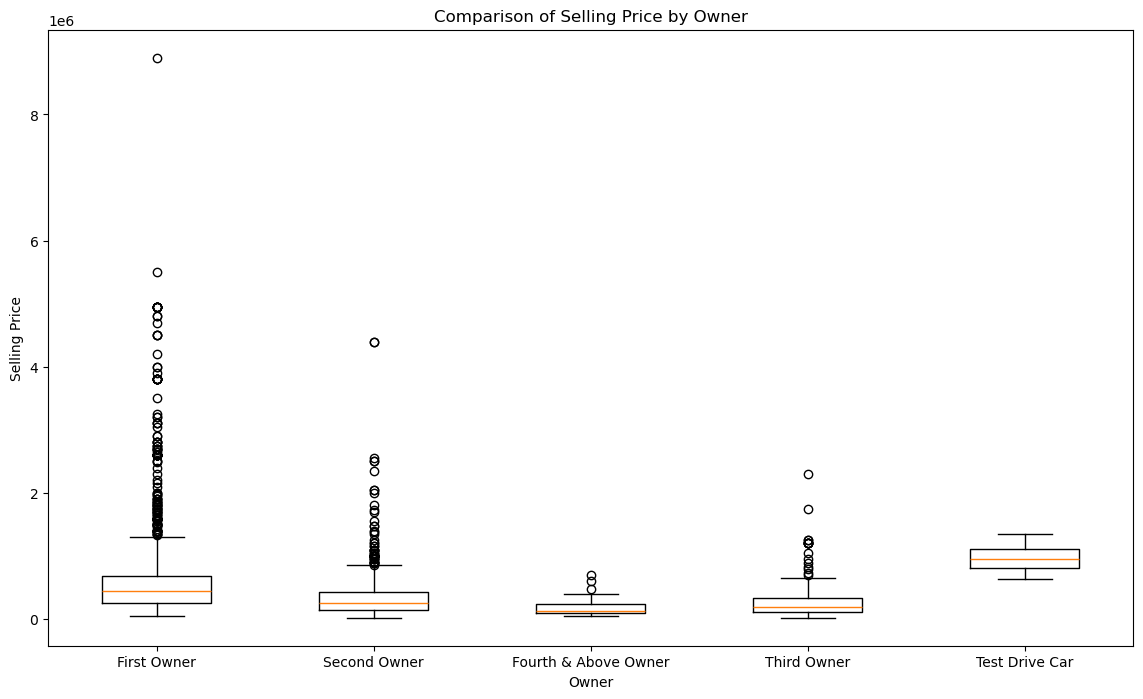

In [24]:
# create variable for label types
owners = df.owner.unique()

# provide data for plotting
owner_plot = [df[df['owner'] == owner]['selling_price'] for owner in owners]

# create the boxplot
plt.figure(figsize=(14, 8))
plt.boxplot(owner_plot, labels=owners)

# input title and labels
plt.title('Comparison of Selling Price by Owner')
plt.xlabel('Owner')
plt.ylabel('Selling Price')
plt.show()

When comparing owner types to the cars' selling price, the most expensive cars sold are test-drive cars. This could be caused because these cars are usually newer and are often still in excellent condition. These cars might have additional warranties or low mileage that are attractive to the customers.

Moreover, these extra features can also contribute to why test-drive cars have 0 outliers. This means that the cars are priced consistently, no extreme high or low prices, making the prices more predictable in the market. 

Meanwhile, the first owner cars have the highest variability and median among the other ownerships (first, second, third, and fourth & above). This clearly shows that prices decrease with the number of owners. Cars with more previous owners might show more depreciation due to wear and tear or perceived reduced value.

In terms of range, the fourth & above owner has the very least range among the rest, implying that they typically have consistent pricing, with limited unpredictable prices for the cars sold. 

The first owner cars also have the highest outliers among the other owner types. This could mean that there are several high-value cars sold, which could include luxury models, rare cars, or extremely well-maintained cars that contribute to the significantly higher prices. 

## Overall Analysis:

In summary, the analysis of car selling prices across several factors underlines the various dynamics of the car market. These findings reveal that fuel type, year, seller type, transmission, and owner history play a critical role in shaping price trends and consumer preferences. 

The data also help us gather that diesel-fueled cars, less used cars with automatic transmissions and those sold by trustmark dealers tend to drive higher prices in the market, indicating strong consumer demand and more premium preferences. Meanwhile, consistent pricing in segments such as test-drive cars and cars owned by more than four owners reflects a predictable market, where consumer expectations are well-defined.

Aside from these analyzed factors, other external factors should be considered such as the current economic conditions, changed consumer behaviors, technological advancements, pandemic, and many others. By finding the correlation between these factors and selling price, it provides valuable insights into pricing strategies, market positioning, and consumer behavior, paving the way for more informed decision-making and strategies in the market. 

## Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Corresponding records that do not match the rules above will be removed. 

In [25]:
# re - check values for each columns
print(df.owner.unique())
print(df.fuel.unique())
print(df.seller_type.unique())

['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']


In [26]:
# first rule: owner to be first, second, and third owner only
df = df.loc[(df.owner == "First Owner") | (df.owner == "Second Owner") | (df.owner == "Third Owner")]
print(f"Length of data after removing some outliers in owner: {len(df)}")
    
# second rule: fuel to be Diesel or Petrol only
df = df.loc[(df.fuel == "Diesel") | (df.fuel == "Petrol")]
print(f"Length of data after removing some outliers in fuel: {len(df)}")
    
# third rule: seller_type to be dealer or individual only and print length of data
df = df[(df.seller_type == "Dealer") | (df.seller_type == "Individual")]
print(f"Total length of data after removing all outliers: {len(df)}")

Length of data after removing some outliers in owner: 3805
Length of data after removing some outliers in fuel: 3751
Total length of data after removing all outliers: 3657


The final data length is 3657, reduced by almost 150 records after removing the outliers.

To make sure, let's check again the remaining values for the owner, fuel, and seller_type columns.

In [27]:
# ensure values are clean for each columns
print(df.owner.unique())
print(df.fuel.unique())
print(df.seller_type.unique())

['First Owner' 'Second Owner' 'Third Owner']
['Petrol' 'Diesel']
['Individual' 'Dealer']


Outliers are successfully removed and df is cleaned.